<a href="https://colab.research.google.com/github/andhara24/ai-analytics/blob/main/google_colab/sat_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.trn"
sat_data = pd.read_csv(url, header=None, delim_whitespace=True)

# Extract the features and target variable
X = sat_data.iloc[:, :-1].values
y = sat_data.iloc[:, -1].values

/tmp/ipython-input-345253382.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sat_data = pd.read_csv(url, header=None, delim_whitespace=True)


In [2]:
X.shape, y.shape

((4435, 36), (4435,))

In [5]:
X

array([[ 92, 115, 120, ..., 107, 113,  87],
       [ 84, 102, 106, ...,  99, 104,  79],
       [ 84, 102, 102, ...,  99, 104,  79],
       ...,
       [ 68,  75, 108, ..., 100, 104,  85],
       [ 71,  87, 108, ...,  91, 104,  85],
       [ 71,  91, 100, ...,  91, 100,  81]])

In [15]:
# Standardize the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
X

array([[ 1.6504898 ,  1.37065618,  1.24035744, ...,  1.04773951,
         0.83669871,  0.23370924],
       [ 1.06432744,  0.79853645,  0.40053984, ...,  0.69624747,
         0.29644556, -0.18971944],
       [ 1.06432744,  0.79853645,  0.16059195, ...,  0.69624747,
         0.29644556, -0.18971944],
       ...,
       [-0.10799728, -0.38971222,  0.52051378, ...,  0.74018398,
         0.29644556,  0.12785207],
       [ 0.11181361,  0.1383983 ,  0.52051378, ...,  0.34475544,
         0.29644556,  0.12785207],
       [ 0.11181361,  0.31443514,  0.04061801, ...,  0.34475544,
         0.05633305, -0.08386227]])

In [8]:
# Split dataset
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, y_train.shape, X_test.shape,y_test.shape, np.unique(y_train)

((3104, 36), (3104,), (1331, 36), (1331,), array([1, 2, 3, 4, 5, 7]))

In [9]:
# Scaling
# Have been done in the PCA preprocessing
#from sklearn.preprocessing import StandardScaler
#sta = StandardScaler()
#X_train = sta.fit_transform(X_train)
#X_test = sta.transform(X_test)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 36)             │         1,332 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           296 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,628 (6.36 KB)

 Trainable params: 1,628 (6.36 KB)

 Non-trainable params: 0 (0.00 B)

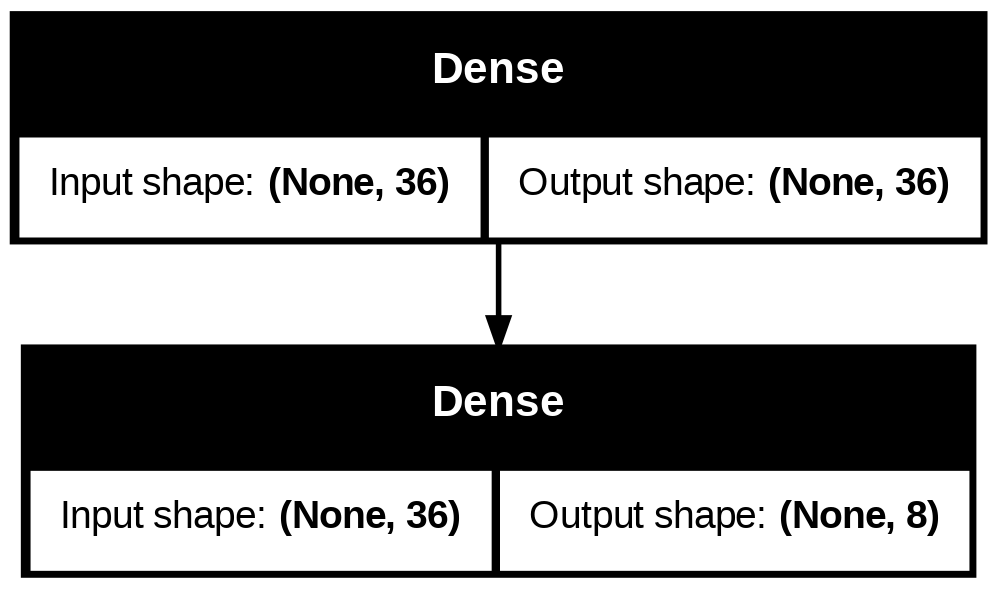

In [10]:
# Create an ANN model
import tensorflow as tf

ann = tf.keras.models.Sequential()
# Add layers
# Input layer
ann.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
ann.add(tf.keras.layers.Dense(36, activation='relu'))

# Use sigmoid for binary, softmax for multi-class
#ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# In softmax, use the units = number of classes
ann.add(tf.keras.layers.Dense(8, activation='softmax'))

# Compile the model
ann.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
ann.summary()
tf.keras.utils.plot_model(ann, show_shapes=True)

In [11]:
# Train the model
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4644 - loss: 1.5286
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8131 - loss: 0.5824
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8526 - loss: 0.4282
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8444 - loss: 0.4108
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8452 - loss: 0.3942
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8470 - loss: 0.3742
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8611 - loss: 0.3541
Epoch 8/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8687 - loss: 0.3423
Epoch 9/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8621 - loss: 0.3324
Epoch 10/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8624 - loss: 0.3388
Epoch 11/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8786 - loss: 0.3040
Epoch 12/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [12]:
# Predicting the test results
y_pred_prob = ann.predict(X_test)

# Softmax return values in probabilities, find the largest as the predicted class
y_pred = np.argmax(y_pred_prob, axis=-1)

# Put as pairs to see them visually
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[5 5]
 [7 7]
 [7 7]
 ...
 [7 7]
 [1 1]
 [3 3]]


In [13]:
# Make a confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
class_labels = np.unique(y_pred)
print("Class labels: {}".format(class_labels))
print(cm)
print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))


Class labels: [1 2 3 4 5 7]
[[324   0   2   0   4   0]
 [  1 146   0   1   1   1]
 [  0   0 271  10   1   5]
 [  1   2  23  62   3  24]
 [  4   2   0   1 116   8]
 [  0   2   7  16  22 271]]
Accuracy = 0.8940646130728775


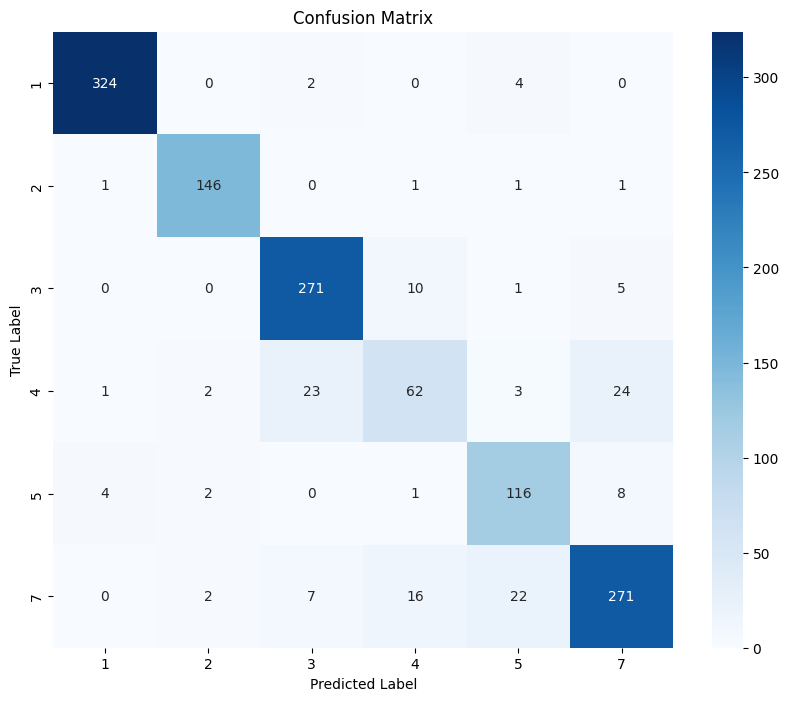

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Compare the results with that of using principal components

In [16]:
from sklearn.decomposition import PCA
import numpy as np

# PCA untuk seluruh komponen
pca_full = PCA()
pca_full.fit(X_train)

# Menghitung cumulative explained variance
cev = np.cumsum(pca_full.explained_variance_ratio_)

# PCA dengan CEV 95%
pca_95 = PCA(n_components=0.95)
X_train_pca95 = pca_95.fit_transform(X_train)
X_test_pca95 = pca_95.transform(X_test)

# PCA dengan CEV 100%
pca_100 = PCA(n_components=None)
X_train_pca100 = pca_100.fit_transform(X_train)
X_test_pca100 = pca_100.transform(X_test)

print("Jumlah PC untuk 95% CEV :", X_train_pca95.shape[1])
print("Jumlah PC untuk 100% CEV:", X_train_pca100.shape[1])


Jumlah PC untuk 95% CEV : 6
Jumlah PC untuk 100% CEV: 36


In [17]:
ann_pca95 = tf.keras.models.Sequential()
ann_pca95.add(tf.keras.layers.Input(shape=(X_train_pca95.shape[1],)))
ann_pca95.add(tf.keras.layers.Dense(36, activation='relu'))
ann_pca95.add(tf.keras.layers.Dense(8, activation='softmax'))

ann_pca95.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ann_pca95.fit(X_train_pca95, y_train, epochs=100, batch_size=32)


Epoch 1/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2991 - loss: 2.3948
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7715 - loss: 0.7979
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8223 - loss: 0.5397
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8386 - loss: 0.4570
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8520 - loss: 0.4011
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8458 - loss: 0.3911
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8507 - loss: 0.3867
Epoch 8/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8533 - loss: 0.3710
Epoch 9/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8552 - loss: 0.3718
Epoch 10/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8648 - loss: 0.3552
Epoch 11/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8649 - loss: 0.3510
Epoch 12/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accurac

In [18]:
ann_pca100 = tf.keras.models.Sequential()
ann_pca100.add(tf.keras.layers.Input(shape=(X_train_pca100.shape[1],)))
ann_pca100.add(tf.keras.layers.Dense(36, activation='relu'))
ann_pca100.add(tf.keras.layers.Dense(8, activation='softmax'))

ann_pca100.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ann_pca100.fit(X_train_pca100, y_train, epochs=100, batch_size=32)


Epoch 1/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3502 - loss: 1.8269
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7845 - loss: 0.7918
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8297 - loss: 0.5425
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8555 - loss: 0.4216
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8512 - loss: 0.4061
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8627 - loss: 0.3698
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8623 - loss: 0.3650
Epoch 8/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8691 - loss: 0.3367
Epoch 9/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8740 - loss: 0.3311
Epoch 10/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8843 - loss: 0.2971
Epoch 11/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8779 - loss: 0.3089
Epoch 12/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

In [21]:
!pip install mlflow
import mlflow
import mlflow.tensorflow

mlflow.set_experiment("SATIMAGE_ANN")

with mlflow.start_run(run_name="ANN_no_PCA"):

    mlflow.log_param("input_features", 36)
    mlflow.log_param("model_type", "ANN without PCA")
    mlflow.log_param("epochs", 100)
    mlflow.log_param("batch_size", 32)

    loss, acc = ann.evaluate(X_test, y_test)
    mlflow.log_metric("accuracy", acc)

    mlflow.tensorflow.log_model(ann, artifact_path="model")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 110.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.8 MB/s eta 0:00:00


2026/01/17 14:55:29 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/01/17 14:55:29 INFO mlflow.store.db.utils: Updating database tables
2026/01/17 14:55:29 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/17 14:55:29 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/17 14:55:29 INFO alembic.runtime.migration: Running upgrade  -> 451aebb31d03, add metric step
2026/01/17 14:55:29 INFO alembic.runtime.migration: Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
2026/01/17 14:55:29 INFO alembic.runtime.migration: Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
2026/01/17 14:55:29 INFO alembic.runtime.migration: Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
2026/01/17 14:55:29 INFO alembic.runtime.migration: Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
2026/01/17 14:55:29 INFO alembic.runtime.migration: Running 

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8821 - loss: 0.3394


2026/01/17 14:55:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/01/17 14:55:31 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


In [22]:
with mlflow.start_run(run_name="ANN_PCA_95"):

    mlflow.log_param("input_features", X_train_pca95.shape[1])
    mlflow.log_param("model_type", "ANN with PCA 95%")
    mlflow.log_param("epochs", 100)

    loss, acc = ann_pca95.evaluate(X_test_pca95, y_test)
    mlflow.log_metric("accuracy", acc)

    mlflow.tensorflow.log_model(ann_pca95, artifact_path="model")


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8903 - loss: 0.2913


2026/01/17 14:56:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/01/17 14:56:46 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


In [23]:
ann_tuning = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])

ann_tuning.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ann_tuning.fit(X_train, y_train, epochs=150, batch_size=32)


Epoch 1/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5484 - loss: 1.3604
Epoch 2/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8395 - loss: 0.4408
Epoch 3/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8650 - loss: 0.3634
Epoch 4/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8721 - loss: 0.3318
Epoch 5/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8692 - loss: 0.3344
Epoch 6/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8813 - loss: 0.3062
Epoch 7/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8910 - loss: 0.3030
Epoch 8/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8850 - loss: 0.2867
Epoch 9/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8883 - loss: 0.2887
Epoch 10/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8993 - loss: 0.2542
Epoch 11/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9078 - loss: 0.2522
Epoch 12/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

In [24]:
with mlflow.start_run(run_name="ANN_Tuned"):

    mlflow.log_param("hidden_layers", "64-32")
    mlflow.log_param("learning_rate", 0.001)
    mlflow.log_param("epochs", 150)

    loss, acc = ann_tuning.evaluate(X_test, y_test)
    mlflow.log_metric("accuracy", acc)

    mlflow.tensorflow.log_model(ann_tuning, artifact_path="model")


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8852 - loss: 0.5359


2026/01/17 15:00:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/01/17 15:00:12 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
